In [2]:
import numpy as np
import pandas as pd

In [3]:
import zipfile
with zipfile.ZipFile('/content/loan_prediction.zip') as zip_file:
    file_list = zip_file.namelist()

file_list

['loan_prediction.csv', '__MACOSX/._loan_prediction.csv']

In [4]:
import pandas as pd
with zipfile.ZipFile('/content/loan_prediction.zip') as zip_file:
    df = pd.read_csv(zip_file.open('loan_prediction.csv'))

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [10]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [14]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [15]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [16]:
df['Gender'].fillna('Not mentioned', inplace=True)

In [17]:
df['Married'].fillna('Not mentioned', inplace=True)

In [18]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [19]:
df['Self_Employed'].fillna('Not mentioned', inplace=True)

In [20]:
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0], inplace=True)

In [21]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [22]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [23]:
df['Gender'].unique()

array(['Male', 'Female', 'Not mentioned'], dtype=object)

In [24]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

Loan approval status


In [26]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

([<matplotlib.patches.Wedge at 0x7f5ec8b53ca0>,
 [Text(-0.6105420895241798, 0.9150072988339757, ''),
  Text(0.6105420038550106, -0.9150073559970479, '')])

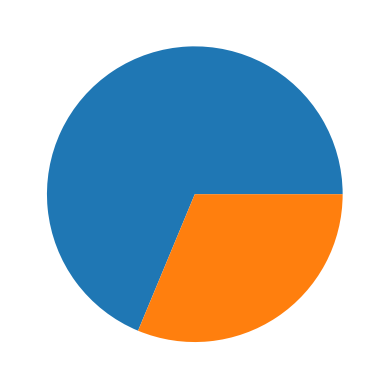

In [27]:
y=df['Loan_Status'].value_counts()
plt.pie(y)

In [28]:
df['Gender'].value_counts()

Male             489
Female           112
Not mentioned     13
Name: Gender, dtype: int64

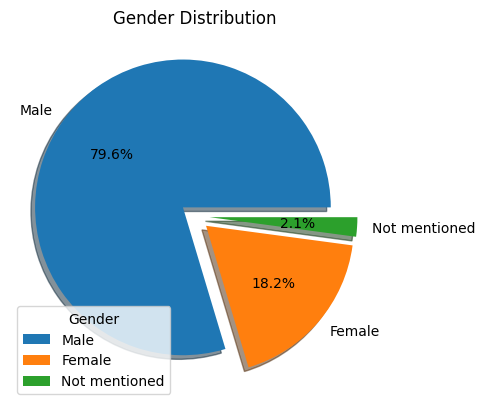

In [29]:
gender_count=df['Gender'].value_counts()
x=[0.1,0.1,0.1]
plt.pie( gender_count.values ,  labels=gender_count.index,autopct='%1.1f%%',explode=x,shadow=True)

plt.title('Gender Distribution')
plt.legend(title="Gender", loc="lower left")
plt.show()

Now let’s have a look at the distribution of the martial status column:



In [30]:
df['Married'].value_counts()

Yes              398
No               213
Not mentioned      3
Name: Married, dtype: int64

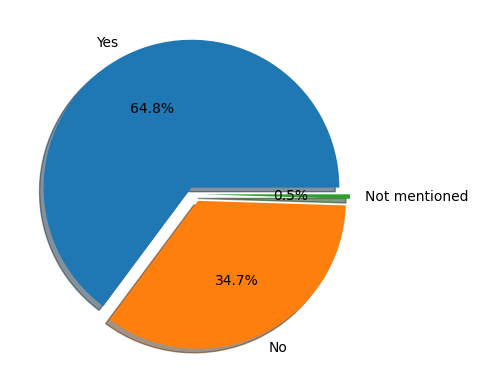

In [31]:
martial_status=df['Married'].value_counts()
x=[0.05,0.05,0.05]
plt.pie(martial_status.values,labels=martial_status.index,autopct='%1.1f%%',explode=x,shadow=True)
plt.show()

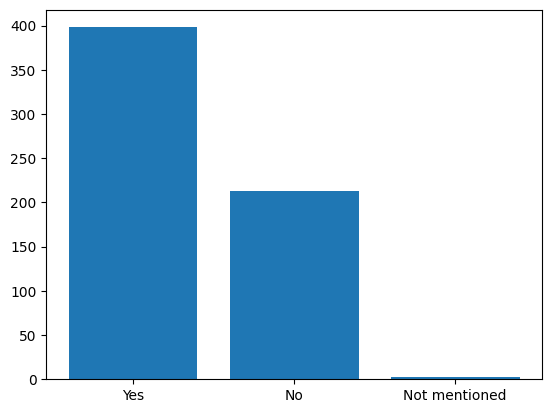

In [32]:
martial_status=df['Married'].value_counts()
y=martial_status.values
x=martial_status.index
plt.bar(x,y)
plt.title='Marital status'

plt.show()

Now let’s have a look at the distribution of the education column:



In [33]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

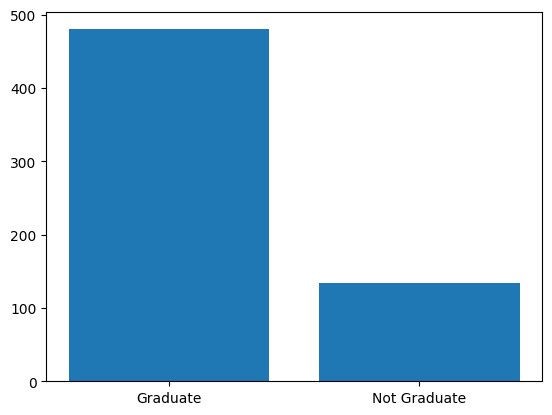

In [34]:
education_count=df['Education'].value_counts()
x=education_count.index
y=education_count.values
plt.bar(x,y)

plt.show()

Now let’s have a look at the distribution of the self-employment column:



In [35]:
df['Self_Employed'].value_counts()

No               500
Yes               82
Not mentioned     32
Name: Self_Employed, dtype: int64

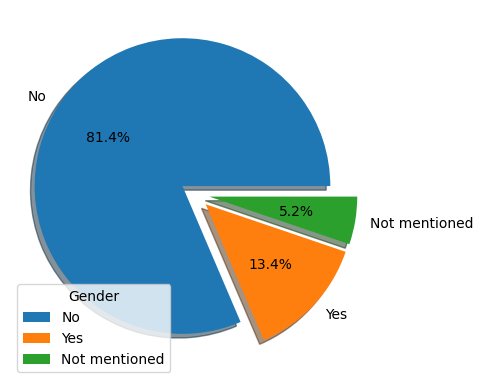

In [36]:
Self_Employed_count=df['Self_Employed'].value_counts()
x=[0.1,0.1,0.1]
plt.pie(Self_Employed_count.values,labels=Self_Employed_count.index,autopct='%1.1f%%',explode=x,shadow=True)

plt.legend(title="Gender", loc="lower left")
plt.show()

Now let’s have a look at the distribution of the Applicant Income column:



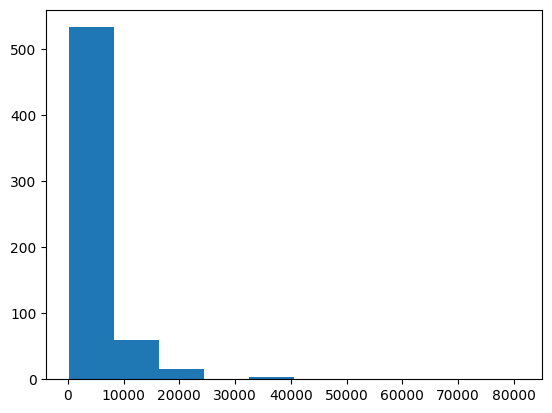

In [37]:
x=df['ApplicantIncome']
plt.hist(x)
plt.show()

Now let’s have a look at the relationship between the income of the loan applicant and the loan status:

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

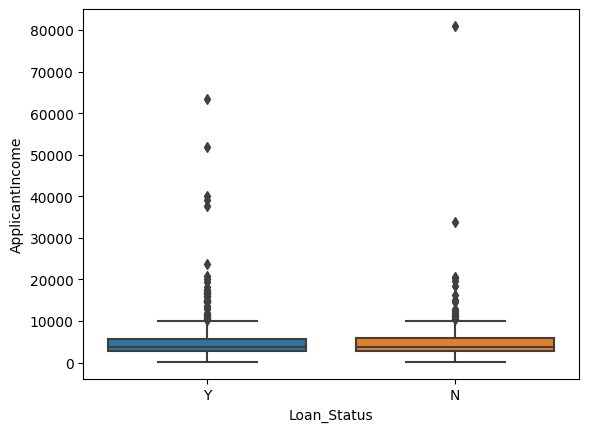

In [38]:
sns.boxplot(x=df['Loan_Status'], y=df['ApplicantIncome'], data=df)

In [39]:
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]

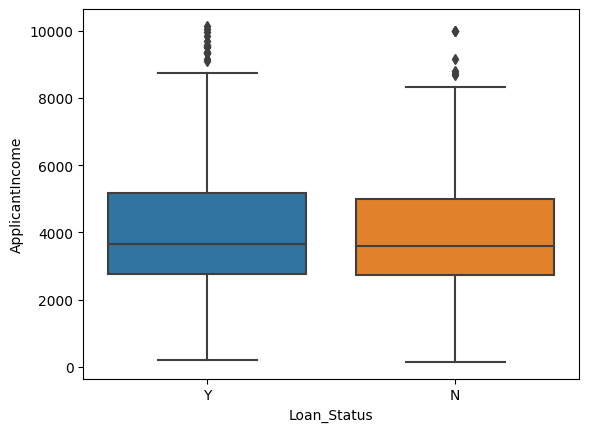

In [40]:
sns.boxplot(x=df['Loan_Status'], y=df['ApplicantIncome'], data=df)
plt.show()

Now let’s have a look at the relationship between the income of the loan co-applicant and the loan status:

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

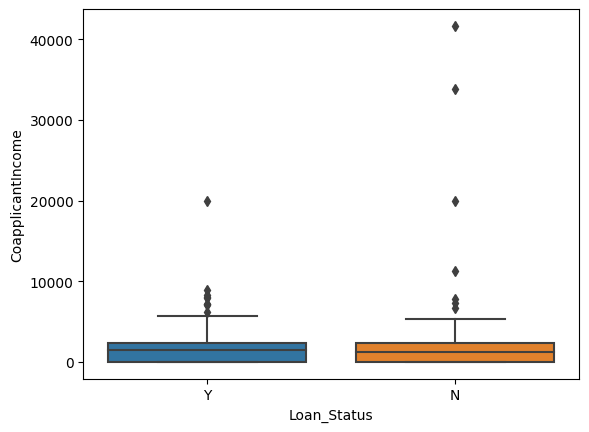

In [41]:
sns.boxplot(x=df['Loan_Status'],y=df['CoapplicantIncome'], data=df)

In [42]:
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['CoapplicantIncome'] >= lower_bound) & (df['CoapplicantIncome'] <= upper_bound)]

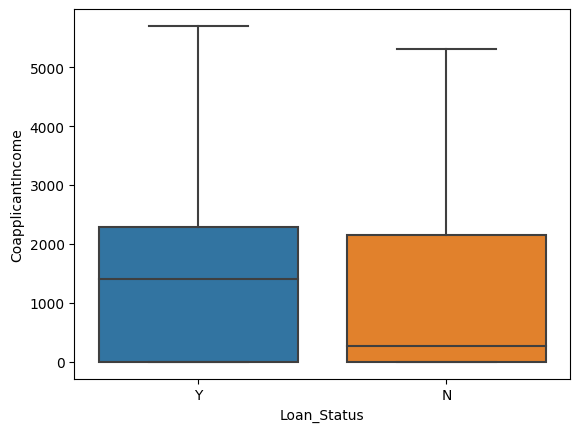

In [43]:
sns.boxplot(x=df['Loan_Status'],y=df['CoapplicantIncome'], data=df)
plt.show()

Now let’s have a look at the relationship between the loan amount and the loan status:



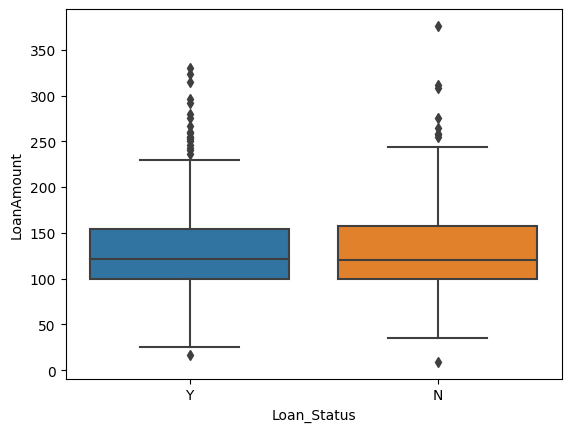

In [44]:
sns.boxplot(x=df['Loan_Status'],y=df['LoanAmount'],data=df)
plt.show()

In [45]:
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['LoanAmount'] >= lower_bound) & (df['LoanAmount'] <= upper_bound)]

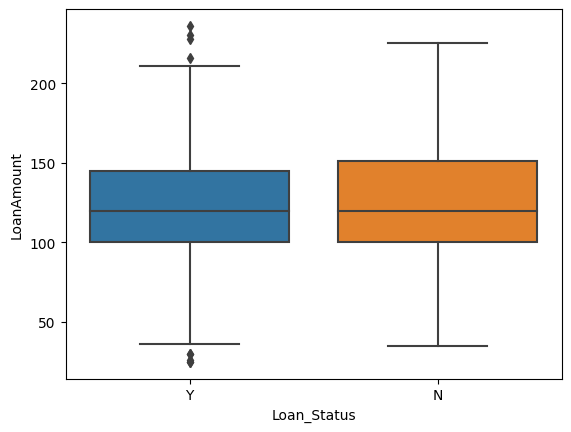

In [46]:
sns.boxplot(x=df['Loan_Status'],y=df['LoanAmount'],data=df)
plt.show()

## **Data Preparation and Training Loan Approval Prediction Model**


In [52]:
df = df.drop('Loan_ID', axis=1)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             520 non-null    object 
 1   Married            520 non-null    object 
 2   Dependents         520 non-null    object 
 3   Education          520 non-null    object 
 4   Self_Employed      520 non-null    object 
 5   ApplicantIncome    520 non-null    int64  
 6   CoapplicantIncome  520 non-null    float64
 7   LoanAmount         520 non-null    float64
 8   Loan_Amount_Term   520 non-null    float64
 9   Credit_History     520 non-null    float64
 10  Property_Area      520 non-null    object 
 11  Loan_Status        520 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 69.0+ KB


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [55]:
# Convert categorical columns to numerical using one-hot encoding
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df = pd.get_dummies(df, columns=cat_cols)

In [56]:
# Split the dataset into features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [73]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [74]:
# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [75]:
from sklearn.svm import SVC
model = SVC(random_state=1)
model.fit(X_train, y_train)

SVC(random_state=1)

Now let’s make predictions on the test set

In [76]:
y_pred = model.predict(X_test)
print(y_pred)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y']


In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8461538461538461

Now let’s add the predicted loan approval values to the testing set as a new column in a DataFrame called X_test_df and show the predicted loan approval values alongside the original features:

In [79]:
# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)
print(X_test_df.head())

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
319         3.367257          -0.933727    0.780439          0.279138   
318        -0.276553          -0.933727   -0.292455          0.279138   
385        -0.205471          -0.933727   -0.267504         -2.404712   
566        -0.393895          -0.933727   -1.340398          0.279138   
207        -0.031714           0.844555   -1.714663          0.279138   

     Credit_History  Gender_Female  Gender_Male  Gender_Not mentioned  \
319        0.406529              0            1                     0   
318        0.406529              1            0                     0   
385        0.406529              0            1                     0   
566        0.406529              0            1                     0   
207        0.406529              0            1                     0   

     Married_No  Married_Not mentioned  ...  Dependents_2  Dependents_3+  \
319           0                      0  ...   

# Summary

Loan approval prediction involves the analysis of various factors, such as the applicant’s financial history, income, credit rating, employment status, and other relevant attributes. By leveraging historical loan data and applying machine learning algorithms, businesses can build models to determine loan approvals for new applicants. 